# Unsupervised Machine Learning in Python - Cluster Analysis

### Course Outline

001. Introduction and Outline
002. What is unsupervised learning used for
003. Why Use Clustering
005. Visual Walkthrough of the K-Means Clustering Algorithm
006. Soft K-Means
007. The K-Means Objective Function
008. Soft K-Means in Python Code
009. Visualizing Each Step of K-Means
010. Examples of where K-Means can fail
011. Disadvantages of K-Means Clustering
012. How to Evaluate a Clustering Purity Davies-Bouldin Index
013. Using K-Means on Real Data MNIST
014. One Way to Choose K
015. K-Means Application Finding Clusters of Related Words
016. Visual Walkthrough of Agglomerative Hierarchical Clustering
017. Agglomerative Clustering Options
018. Using Hierarchical Clustering in Python and Interpreting the Dendrogram
019. Description of the Gaussian Mixture Model and How to Train a GMM
020. Comparison between GMM and K-Means
021. Write a Gaussian Mixture Model in Python Code
022. Practical Issues with GMM Singular Covariance
023. Kernel Density Estimation
024. Expectation-Maximization
025. Future Unsupervised Learning Algorithms You Will Learn
026. How to install Numpy Scipy Matplotlib Pandas IPython Theano and TensorFlow
027. How to Code by Yourself part 1
028. How to Code by Yourself part 2



### Introduction

+ Real-world doesn't provide you with labels 
+ Need to look for patterns 
+ How do we get data for supervised learning? 
    + Nice CSV with Xs and Ys 
    + Someone has to make these - manual labor 
    + Sometimes infeasible or costly 
+ Clustering 
    + K-means, hierarchical 
+ Gaussian Mixture Models 
     + Density Estimation 
     + Comparison with K-Means 

### What is unsupervised learning used for? 

+ "Learning the structure or probability distribution of the data" 
+ Specific examples: 
    + Density Estimation 
        + Given xl, x2, x3, ... find the PDF probability density function, p(x) 
        + You can then generate new samples i.e. Generate a Shakespeare play 
    + Latent variables 
        + Underlying cause 
        + Missing or hidden data 
        + e.g. You have a bunch of documents, and find distinct clusters 
        + Clusters reveal romance novels, children's books, etc... 
        + "Topic Modeling" (Z = topic —> X = words/document) 

#### More uses 

+ Dimensionality Reduction:  Will talk about this more in the context of deep learning 
+ Visualization: 
    + Scatterplots 
    + Can also tell us when an algorithm is NOT working

### Why Study Clustering? 

+ Clustering techniques are a staple of machine learning
+ Not all data comes with labels 
+ Getting labeled data is costly and time consuming 
+ Clustering helps us find "automatic" labels
+ Ex. cluster book titles: find patterns like "science fiction", "romance", etc. 
+ Automatically "bucket" your categories

#### Scenario  - Search 

+ Consider this scenario: You're creating a search engine with a huge list of documents 
+ Map each document to a vector using technique like TF-IDF 
+ If you want to learn more, take my NLP class, but it suffices to know we can map a document to a vector of numbers for this example
+ E.g. Doc1 = [ 0.5, 0.2, 03, 0.3, ...]
+ When user enters a query, we map it to a vector 
+ Then find the closest document vectors to the query 
+ Called "nearest neighbor" search 
+ Naive search: O(N) —> impractical

Clustering can help! Break query down into 2 steps:
    
1. Identify which cluster to search in
    + Should be much faster since # clusters < documents 
2. Look for nearest neighbors within the cluster 
    + Should be much faster since cluster size < total # documents 
    
<img src="./resources/clusters.png" alt="cluster" height="50%" width="50%" align="left" />

### Density Estimation 

+ Once we have a probability distribution, we can do interesting things like generate samples from it 
+ Generate a Shakespeare play 
+ Learn the structure of blues music; generate our own blues music 
+ Imagine: a world where your favorite music is generated by robots 
+ You'll learn that K-Means Clustering is actually a special case of Gaussian Mixture Models (GMMs)
+ Thus, clustering & density estimation closely related 
+ Sequel to this course: Hidden Markov Models (HMMs), GMMs can be applied to sequences / time series 

### K-Means Clustering 

+ Given a bunch of unlabeled data, we want to find natural groupings, or clusters
+ Input: An N x D matrix X 
+ N samples 
+ D features (dimensionality)

### Training Algorithm 
 
1. Initialize m(1), m(2), ..., m(k) random points in X 
2. While not converged: 
3. Decide which cluster each point in X belongs to. 
4. Recalculate cluster centers based on the x's that were assigned to it (i.e. mean)

### Problem with K-Means 

+ Highly sensitive to initialization 
+ Possible resolution: restart multiple times, use whichever result gives us the best final objective 
+ What does this tell us? Local minima 
+ Another possible resolution: "fuzzy" membership in each class 
+ Just a small adjustment to the original k-means algorithm



### Soft K-Means

<img src="./resources/softKmeans.png" alt="Soft K-Means" height="50%" width="50%" align="left" />

### Objective Function 

+ If x(n) is far away from mean of cluster k, hopefully that responsibility has been set very low. 
+ In deep learning we use gradient descent, but we did not do any here! 
+ Instead we used "coordinate descent" (only update one variable at a time). 
+ Mathematical guarantee that J will always decrease with each iteration (but not necessarily to global minimum) 

<img src="./resources/objectiveFn.png" alt="Objective Function" height="30%" width="30%" align="left" />

### K-Means in Python

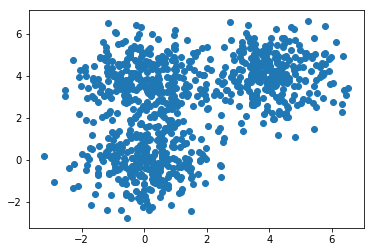

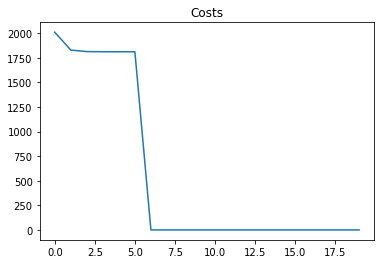

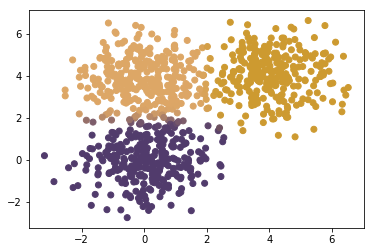

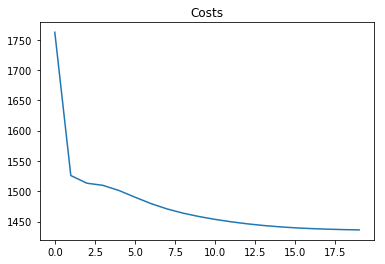

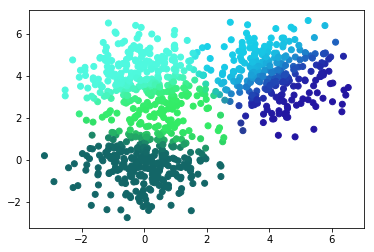

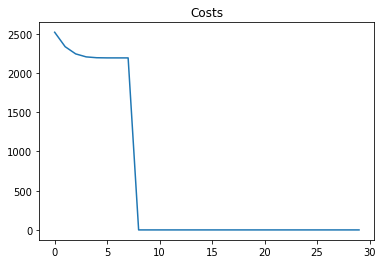

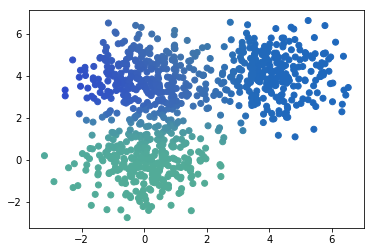

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def d(u,v):
    diff = u-v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k] * d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter = 20, beta = 1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
    
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:, k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break
    
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    random_colors = np.random.random((K,3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c= colors)
    plt.show()        
        
def main():
    D = 2
    s = 4

    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])

    N = 900
    X = np.zeros((N,D))
    X[:300, : ] = np.random.randn(300, D) + mu1
    X[300:600, : ] = np.random.randn(300, D) + mu2
    X[600: , : ] = np.random.randn(300, D) + mu3

    plt.scatter(X[:,0], X[:, 1])
    plt.show()
    
    K = 3
    plot_k_means(X, K)
    
    K = 5
    plot_k_means(X, K)
    
    K = 5
    plot_k_means(X, K, max_iter=30, beta=0.3)
    
    
if __name__ == '__main__':
    main()

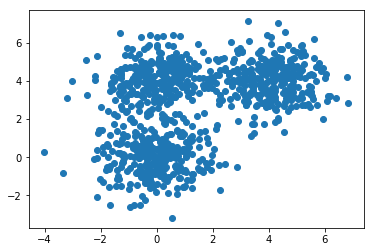

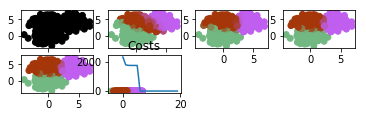

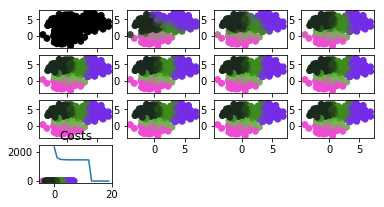

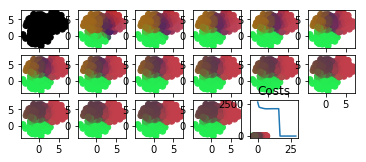

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def d(u,v):
    diff = u-v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k] * d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter = 20, beta = 1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K,3))
    plt.figure()
    
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c= colors)
        
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
    
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:, k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break
    
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
            
        
def main():
    D = 2
    s = 4

    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])

    N = 900
    X = np.zeros((N,D))
    X[:300, : ] = np.random.randn(300, D) + mu1
    X[300:600, : ] = np.random.randn(300, D) + mu2
    X[600: , : ] = np.random.randn(300, D) + mu3

    plt.scatter(X[:,0], X[:, 1])
    plt.show()
    
    K = 3
    plot_k_means(X, K)
    
    K = 5
    plot_k_means(X, K)
    
    K = 5
    plot_k_means(X, K, max_iter=30, beta=0.3)
    
    
if __name__ == '__main__':
    main()

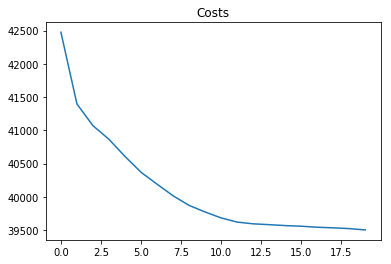

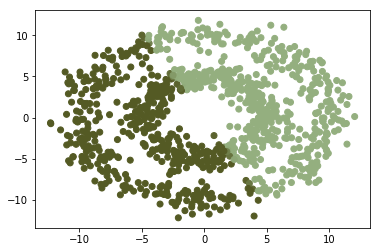

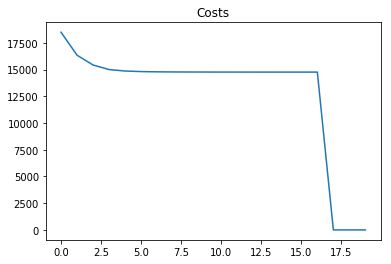

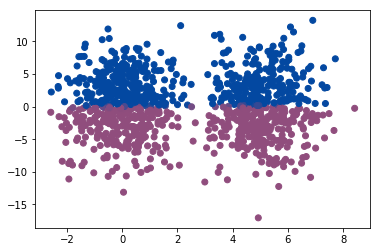

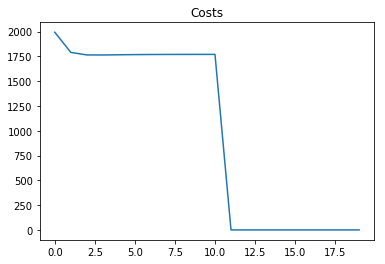

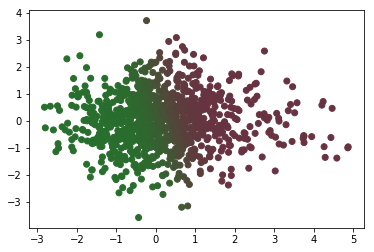

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def d(u,v):
    diff = u-v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k] * d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter = 20, beta = 1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
    
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:, k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break
    
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    random_colors = np.random.random((K,3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c= colors)
    plt.show()   

def donut():
    N = 1000
    D = 2
    t = int(N/2)
    
    R_inner = 5
    R_outer = 10
    
    R1 = np.random.randn(t) + R_inner
    theta = 2 * np.pi * np.random.random(t)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T
    
    R2 = np.random.randn(t) + R_outer
    theta = 2 * np.pi * np.random.random(t)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T
    
    X = np.concatenate([X_inner, X_outer])
    
    return X

def main():
    X = donut()
    plot_k_means(X,2)
    
    X = np.zeros((1000, 2))
    X[: 500, :] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
    X[500: , :] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
    plot_k_means(X,2)
    
    X = np.zeros((1000, 2))
    X[ : 950, :] = np.array([0, 0] ) + np.random.randn(950, 2)
    X[950 : , :] = np.array([3, 0] ) + np.random.randn(50, 2)
    plot_k_means(X,2)
    
    
if __name__ == "__main__":
    main()
    

### Disadvantages of K-Means 

+ You have to choose K
    + We can look at 2-D or 3-D data to help us choose. What about 100-D data?
+ Local minima
    + Not necessarily bad (deep learning). But in K-Means it's bad.
    + Restart multiple times
+ Sensitive to initial configuration
+ Can't solve donut problem
    + Can't even solve elliptical problem
    + Can only look for spherical clusters
+ Doesn't take into account the density of the data

### Cost Function Alternatives 

+ Current cost function: 

Pros: 

+ Decreases on every round 
+ Makes perfect sense - We want data points to be close to cluster center that it belongs to, so squared distance should be low when responsibility —> l
+ We want "low intra-cluster distances" 
+ We want "high inter-cluster distances"

<img src='./resources/cluster-distance.png' alt='cluster-distance' height='30%' width='30%' align='left'/>

Cons:
    
+ Really large dataset: Since it's the sum of squared distances, it grows with size of dataset 
+ Sensitive to scale: Data is in range 0..1, squared distances will be < 1, Data in range ~10e6, squared distances will be ~10e12
+ Sensitive to K: if K = N (trivial case), cost = 0 

### Cost Function Alternatives 

Cons: 
    
+ Large dataset: Can just divide by N and D 
+ Scale: Can just normalize the data first (i.e. subtract mean, divide by standard deviation) 
+ Sensitive to K: Not so easy to adjust for 
    
Is high K = overfitting? No! Overfitting is a concept useful for supervised learning. It means we go too close to training targets, far away from test targets. This is unsupervised, we have no targets.

### Purity 

+ Balances by # samples 
+ ck = set of data points that belong to cluster k 
+ tj = set of data points that belong to target class j
+ We need to search over all j - max intersection means "this is the most likely class" 
    + Example: MNIST handwritten digits from 0..9 
+ We have a cluster center, we don't know what it means, but we know which data points belong to it from k-means 
+ We check all the true targets, suppose the max intersection is the class '5' 
+ Then we know this cluster represents the handwritten digits for '5' 
+ Therefore, max purity 1 (think of it as accuracy)
+ Big disadvantage: it requires true labels 
+ If we have true labels, might as well do supervised learning 
+ Other measures that require targets: 
    + Rand measure 
    + F-measure 
    + Jaccard Index 
    + Normalized Mutual Information 
+ Methods that require true labels are called "external validation" methods

<img src="./resources/purity.png" alt="purity" align = "left" />


### Davies-Bouldin Index 

+ Example of an "internal validation" method 
+ Sigma_k = average distance from each data point in cluster k to its center
+ "Sigma" is an appropriate symbol because that's like a standard deviation 
+ We need to account for probabilistic responsibilities 
+ d(ck , cj) distance from center of cluster k to center of cluster j 
+ Ideally, we want numerator to be small and denominator to be large- Why? 
+ Everything within a cluster should be closer together 
+ And clusters should be far apart from other clusters 
+ Lower DBI = better 

<img src="./resources/dbi.png" alt="Davies-Bouldin Index" align = "left" />

### K-means on MNIST Dataset

+ [Data](https://www.kaggle.com/c/digit-recognizer)
+ There are N = 42000 samples
+ Each image is a D = 28 * 28 = 784 dimensional vector
+ you can plot an image by reshaping to (28,28) and using plt.imshow()

Reading in and transforming data...
Number of data points: 10000


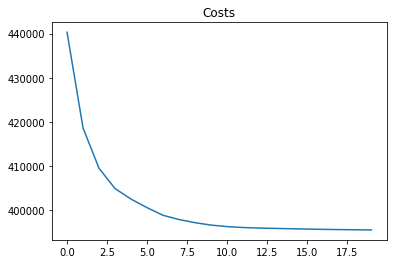

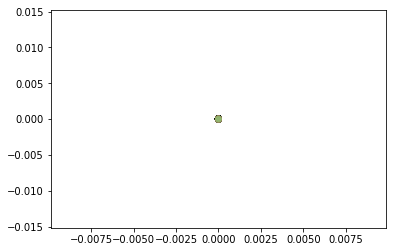

Purity: 0.605526576312
Purity 2 (hard clusters): 0.6066
DBI: 2.98336171319
DBI 2 (hard clusters): 2.97040054248


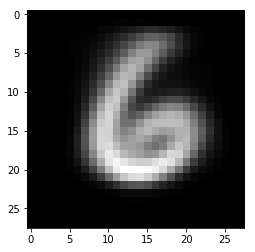

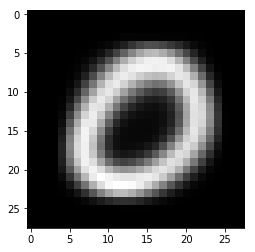

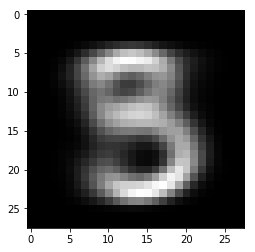

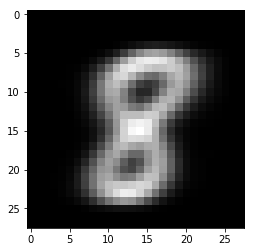

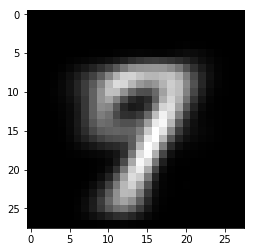

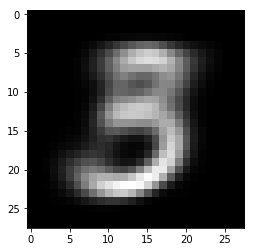

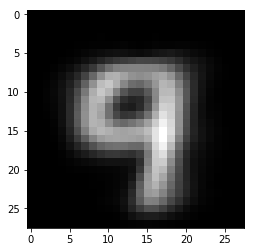

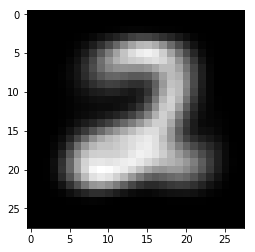

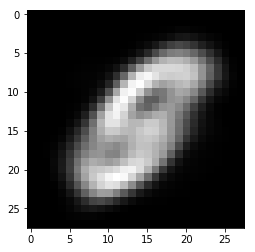

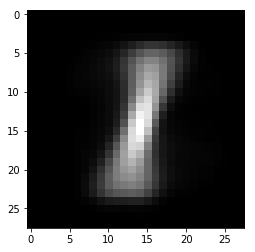

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import plot_k_means
from datetime import datetime

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('./data/train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

# hard labels
def purity2(Y, R):
    # maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) # cluster assignments

    N = len(Y) # number of data pts
    K = len(set(Y)) # number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C == k) & (Y == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N

def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

# hard labels
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K

def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K


def main():
    # mnist data
    X, Y = get_data(10000)

    # simple data
    # X = get_simple_data()
    # Y = np.array([0]*300 + [1]*300 + [2]*300)

    print("Number of data points:", len(Y))
    M, R = plot_k_means(X, len(set(Y)))
    # Exercise: Try different values of K and compare the evaluation metrics
    print("Purity:", purity(Y, R))
    print("Purity 2 (hard clusters):", purity2(Y, R))
    print("DBI:", DBI(X, M, R))
    print("DBI 2 (hard clusters):", DBI2(X, R))

    # plot the mean images they should look like digits
    for k in range(len(M)):
        im = M[k].reshape(28, 28)
        plt.imshow(im, cmap='gray')
        plt.show()

if __name__ == "__main__":

    main()

### Choosing K 
    
### Cost decreases as K increases 
+ Cost ALWAYS decreases as K increases, there's no notion of "generalization" or "test error" with unsupervised learning 
+ Why? 
+ Cost = within-cluster sum-of-squared error 
+ i.e. Closer to center = cost is lower 
+ But adding more cluster centers (a.k.a. Increasing K) helps ALL points be closer to a cluster center 

+ If that doesn't make sense, picture the scenario where K = N (# of data points) 
+ Here, each cluster consists of only 1 data point 
+ Therefore, the center of the cluster is the data point 
+ Therefore, the total cost 0 (since all distances are 0) 

### Behavior as K increases
+ We observe interesting behavior as K = 1..N 
+ Hockey-stick shape - sharp decrease, then steady 
+ Therefore, at some point, increasing K only leads to marginal improvements 

<img src="./resources/k-means.png" alt="k-means behaviour" />

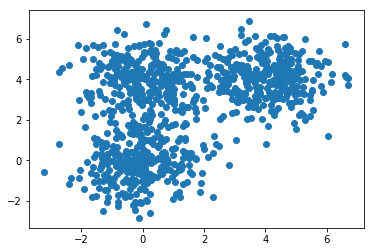

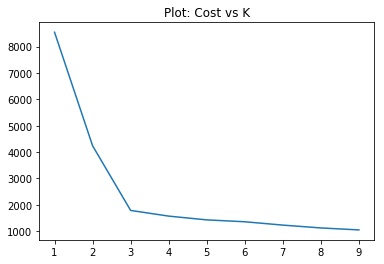

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kmeans import plot_k_means, get_simple_data, cost

def main():
    X = get_simple_data()
    
    plt.scatter(X[:,0], X[:,1])
    plt.show()    
    
    costs = np.empty(10)
    costs[0] = None
    for k in range(1, 10):
        M, R = plot_k_means(X, k, show_plots=False)
        c = cost(X, R, M)
        costs[k] = c
        
    plt.plot(costs)
    plt.title("Plot: Cost vs K")
    plt.show()
    
if __name__ == "__main__":
    main()

Z.shape (899, 4)


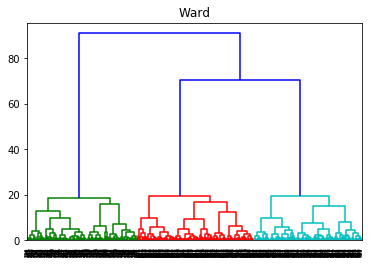

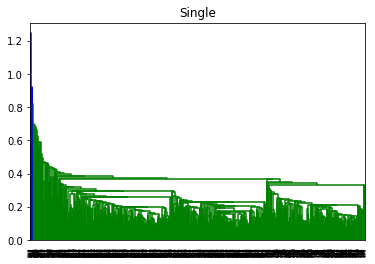

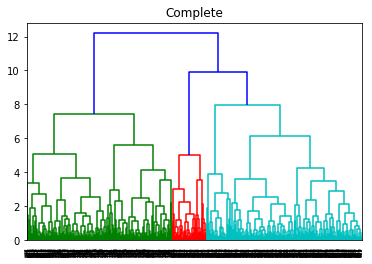

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

def main():
    D = 2
    s = 4
    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])
    
    N = 900 # no. of samples
    X = np.zeros((N,D))
    X[:300, :]    = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :]    = np.random.randn(300, D) + mu3
    
    Z = linkage(X, 'ward')
    print("Z.shape", Z.shape)    
    plt.title("Ward")
    dendrogram(Z)
    plt.show()
    
    Z = linkage(X, 'single')
    plt.title("Single")
    dendrogram(Z)
    plt.show()
    
    Z = linkage(X, 'complete')
    plt.title("Complete")
    dendrogram(Z)
    plt.show()
    
if __name__ == "__main__":
    main()

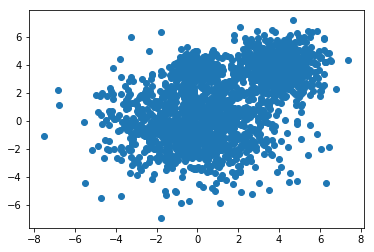

ValueError: operands could not be broadcast together with shapes (4000,4000) (2,2) 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

def gmm(X, K, max_iter=20):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K
    
    for k in range (K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.diag(np.ones(D))
    
    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K))
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                weighted_pdfs[n,k] = pi[k] * multivariate_normal.pdf(X[n], M[k], C[k])

        for k in range(K):
            for n in range(N):
                R[n,k] = weighted_pdfs[n, k] / weighted_pdfs[n, :].sum()
        
        for k in range(K):
            Nk = R[:, k].sum()
            pi[k] = Nk / N
            M[k] = R[: ,k].dot(X) / Nk
            X_minus_mu = X - M[k]
            C[k] = np.sum(R[n,k] * np.outer(X_minus_mu, X_minus_mu) for n in range(N)) / Nk + np.diag(np.ones(D) )* 0.001
            
        costs = np.log(weighted_pdfs.sum(axis = 1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1 :
                break;
    
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    
    random_colors = np.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c =colors)
    plt.show()
    
    print("PI : ", pi)
    print("Means : ", M)
    print("Covarinaces : ", c)    

def main():
    D = 2
    s = 4
    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])
    
    N = 2000 # no. of samples
    X = np.zeros((N,D))
    X[:1200, :]    = np.random.randn(1200, D)*2 + mu1
    X[1200:1800, :] = np.random.randn(600, D) + mu2
    X[1800:, :]    = np.random.randn(200, D)* (0.5) + mu3
    
    plt.scatter(X[:,0], X[:,1])
    plt.show()
    
    K = 3
    gmm(X, K)
    
    
    
if __name__ == "__main__":
    main()

### K-Means Application: Related Words 

+ Plot and find clusterings of words from book titles 
+ Much of the code is copied & pasted from my NLP course 
+ Check if out if you want to go more in-depth about how to deal with text in machine learning 

### Highlights 

+ Create a term-document matrix (each "document" is a book title) 
+ N = # words in vocabulary 
+ D = # documents 
+ X\[n,d] =  # of times word n appears in document d 

### Highlights 
+ Convert X into a TF-IDF matrix 
+ TF = term-frequency word = counts 
+ IDF = inverse document-frequency 
+ Why? 
+ Pure word counts can be misleading 
+ "Neutron" appears a lot —> document about physics 
+ "The" and "it" appear a lot —> meaningless 
+ They appear a lot in many documents 
+ Therefore, scale the term-frequency by inverse document freq

<img src="./resources/NxD.png" alt="NxD" align="left" />

+ Reduce dimensionality from D —> 2, so that we can plot it 
+ Use an algorithm called "t-SNE" 
+ Taught in sequel to this course, Unsupervised Deep Learning 

<img src="./resources/Nx2.png" alt="Nx2" align="left" />

+ Finally, we perform K-Means with K= N/10 
+ Naive assumption that each cluster will have 10 words on average 
+ Save scatterplot instead of showing it(It's huge, will be slow, need to zoom in)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

randm_colors = np.random.random((K,3)) 
colors = R.dot(randm_colors) 
plt.figure(figsize = (80.0,80.0))
plt.scatter(X[:,0], x[:,1], s=300, alpha=0.9,c=colors)
annotate1(X,index_world_map)
# plt.show()
plt.savefig("./resources/test.png")

NameError: name 'K' is not defined

Annotate the plot (so we know which dot is what word) but move the words randomly so they don't collide - see the function annotatel() 

Let's also printout the words in each cluster (easier to look at than scatterplot)

In [ ]:
# Print out the clusters